In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
housing = fetch_california_housing()

In [5]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [7]:
data = pd.DataFrame(housing.data, columns = housing.feature_names)

In [8]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
data["MedHouseVal"] = housing.target

In [10]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: xlabel='MedInc'>

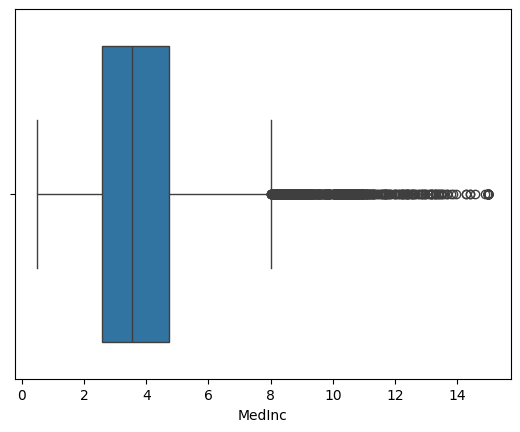

In [12]:
sns.boxplot(x=data["MedInc"]) #looking for outliers

## Removing Outliers from Dataset

In [13]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1

In [14]:
iqr

MedInc           2.179850
HouseAge        19.000000
AveRooms         1.611665
AveBedrms        0.093447
Population     938.000000
AveOccup         0.852520
Latitude         3.780000
Longitude        3.790000
MedHouseVal      1.451250
dtype: float64

In [15]:
df = data.copy()

In [16]:
df = df[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]

In [17]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992


In [18]:
x = df.drop(["MedHouseVal"], axis=1)

In [19]:
y = df["MedHouseVal"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.6, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()

In [23]:
scxtrain = scx.fit_transform(xtrain)
scxtest = scx.transform(xtest)

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
tree = DecisionTreeRegressor()

In [26]:
tree.fit(scxtrain, ytrain)

DecisionTreeRegressor()

In [27]:
pred = tree.predict(scxtest)

In [28]:
pred

array([2.695, 1.16 , 2.337, ..., 1.751, 2.735, 1.328])

In [29]:
ytest

107      2.594
4989     1.164
8000     2.084
8624     4.537
5        2.697
         ...  
11294    1.905
10600    2.741
8517     2.101
8967     3.360
15351    1.310
Name: MedHouseVal, Length: 9788, dtype: float64

In [30]:
np.mean((pred-ytest)**2)

0.43050522860851037

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
mean_squared_error(pred, ytest)

0.43050522860851037

## Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rf_regressor =RandomForestRegressor(10)
rf_regressor.fit(scxtrain, ytrain)

RandomForestRegressor(n_estimators=10)

In [46]:
predy = rf_regressor.predict(scxtest)

In [47]:
mean_squared_error(predy, ytest)

0.23202280212950632

## Done! :D